<a href="https://colab.research.google.com/github/0ldspur/0ldspur/blob/main/ADC_Lab4_class_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# pip install opencv-python

In [7]:
!pip install opencv-python matplotlib numpy

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


In [23]:
from google.colab import files
uploaded = files.upload()

# Assuming the image file is named "Image road lanes.jpg"
filename = next(iter(uploaded))  # Get the filename from the uploaded dictionary

import cv2 as cv
img = cv.imread(filename, 0)  # Read the uploaded image using OpenCV
# img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
# img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

Saving Image road lanes.jpg to Image road lanes (1).jpg


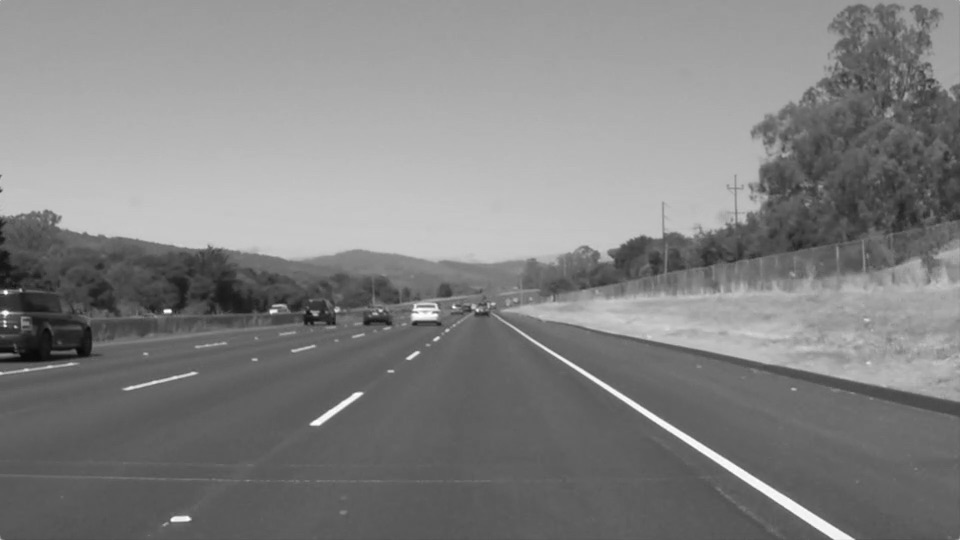

In [24]:
cv2_imshow(img)

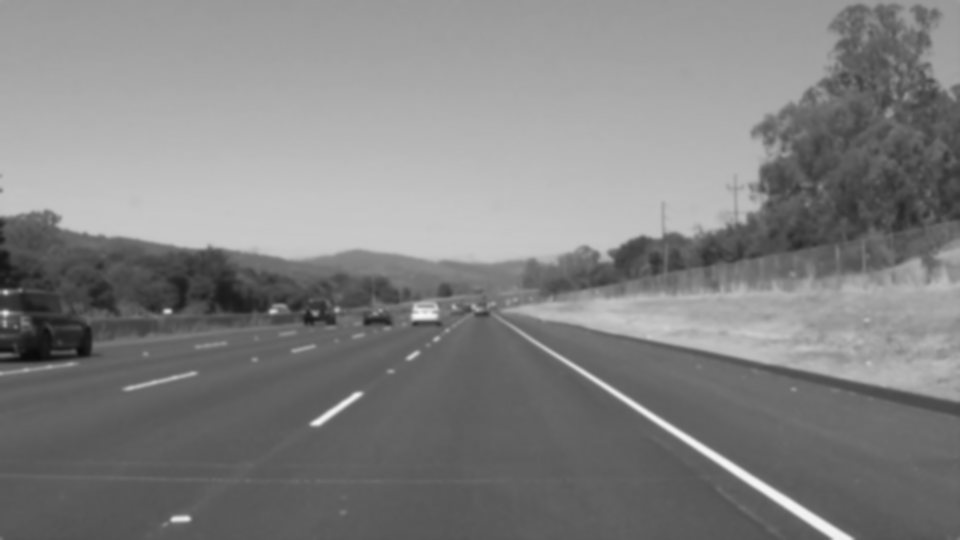

In [35]:
blur = cv.GaussianBlur(img,(7,7),0)
cv2_imshow(blur)

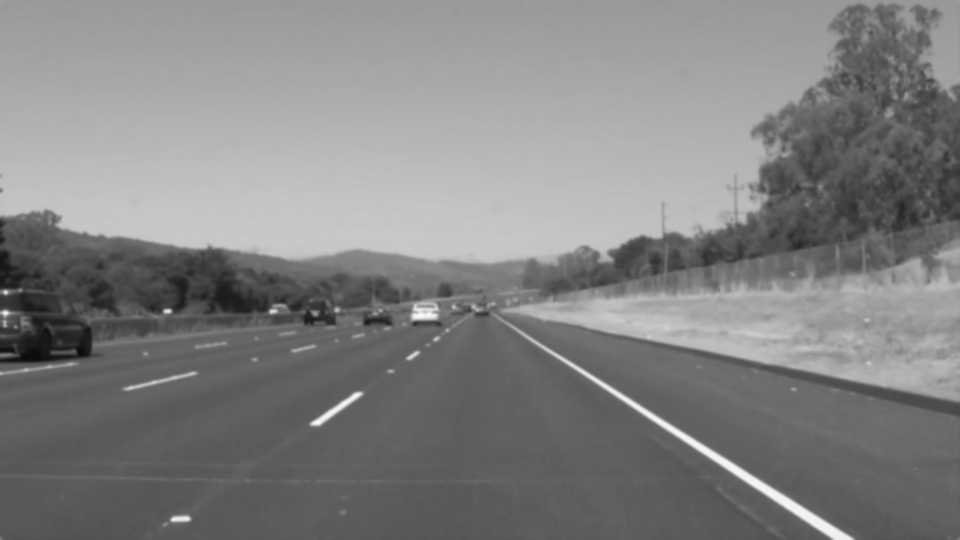

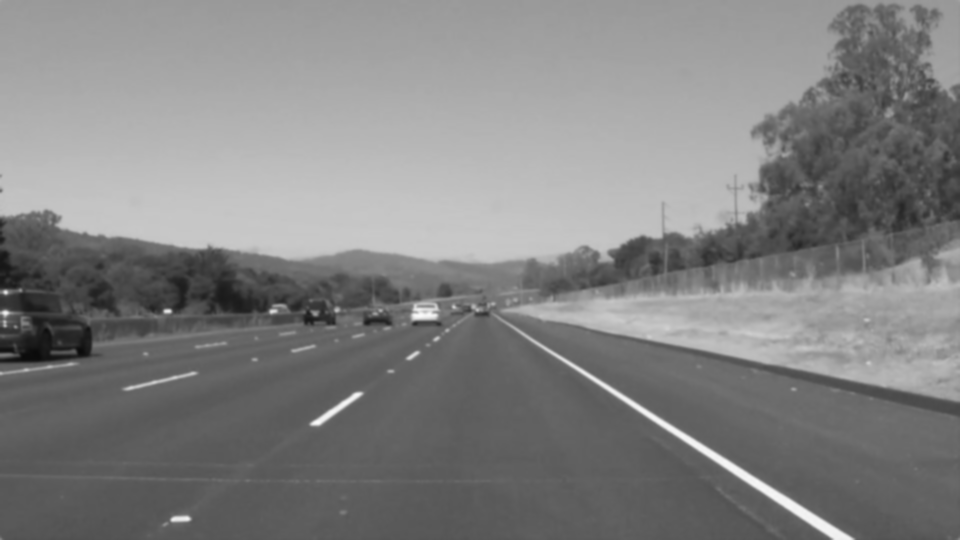

In [34]:
img_g=cv.GaussianBlur(img, (5, 5), 0)
cv2_imshow(img_g)

img_g_segma=cv.GaussianBlur(img, (0, 0), 1)
cv2_imshow(img_g_segma)

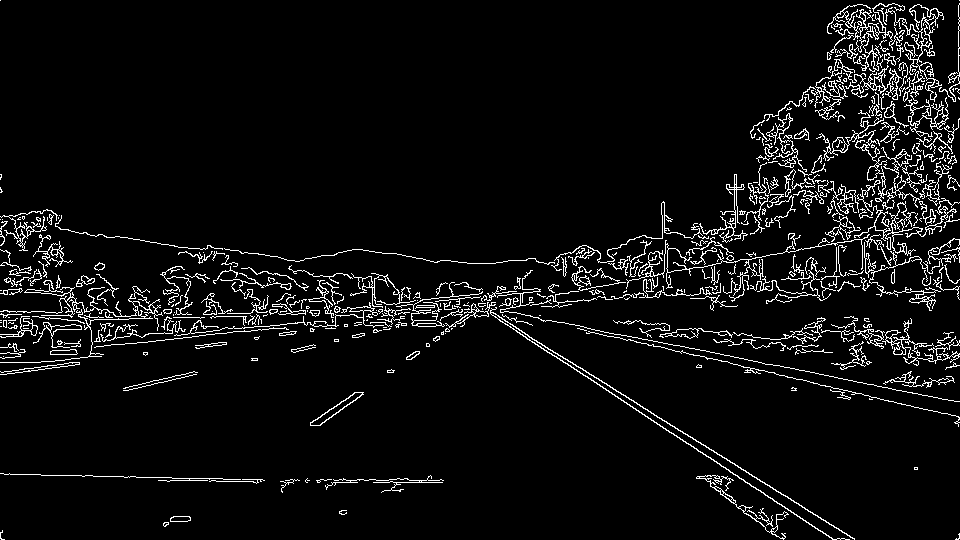

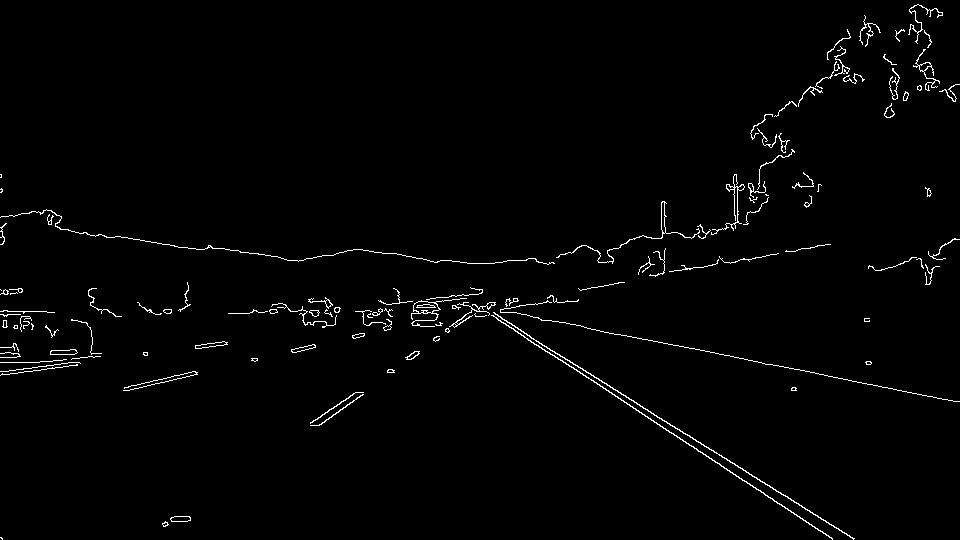

In [28]:
img_c_1=cv.Canny(img,0,100)
cv2_imshow(img_c_1)
img_c=cv.Canny(img_g,50,150)
cv2_imshow(img_c)

In [29]:
height, width = img.shape
roi_vertices = [
    (0, height),
    (int(width / 2), int(height / 2)),
    (width, height)
]
print(roi_vertices)

[(0, 540), (480, 270), (960, 540)]


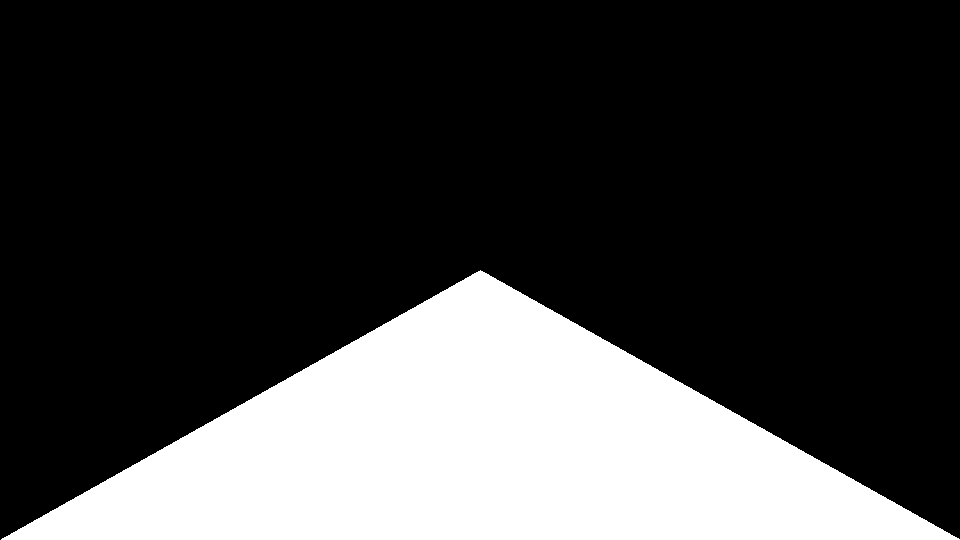

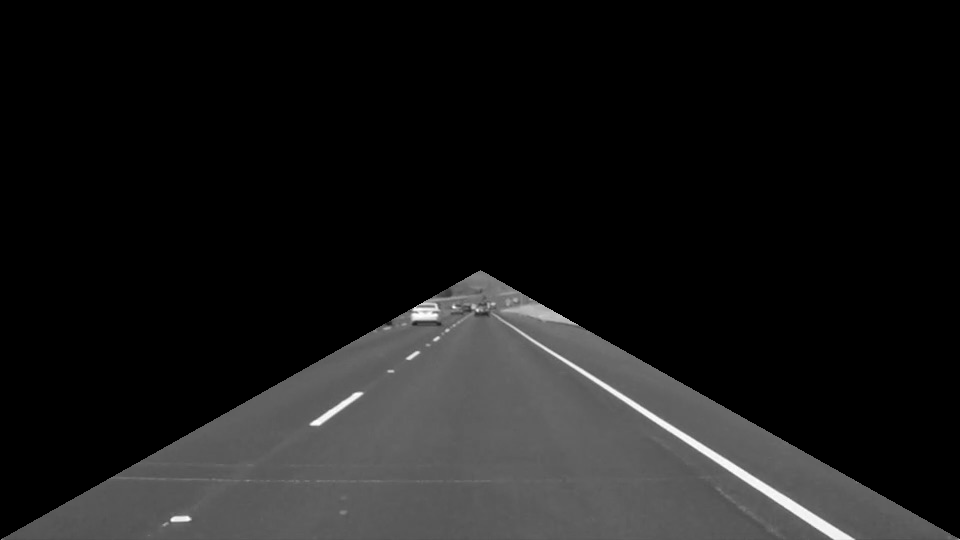

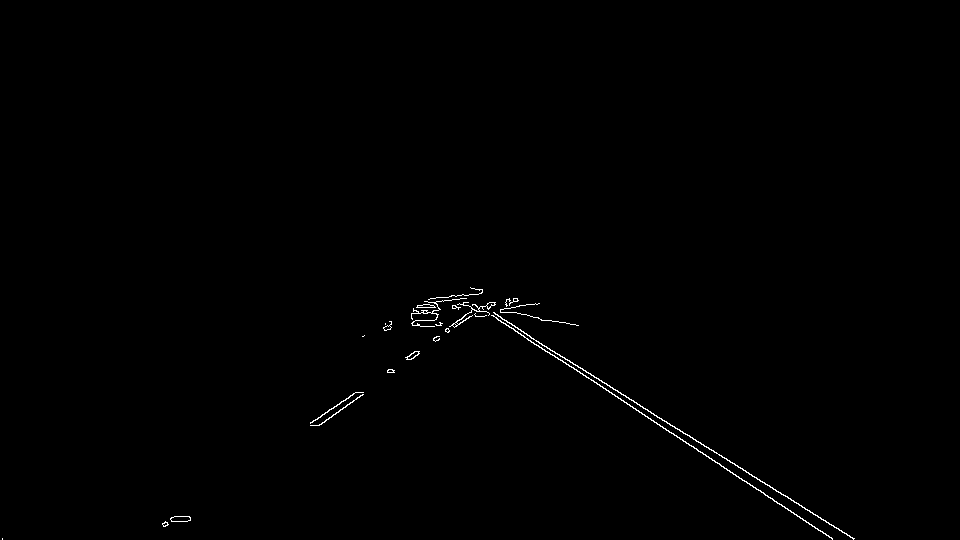

In [30]:
mask = np.zeros_like(img_c)
x= cv.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), 255)
cv2_imshow(x)
masked_image = cv.bitwise_and(img, mask)
cv2_imshow(masked_image)
masked_edge = cv.bitwise_and(img_c, mask)
cv2_imshow(masked_edge)

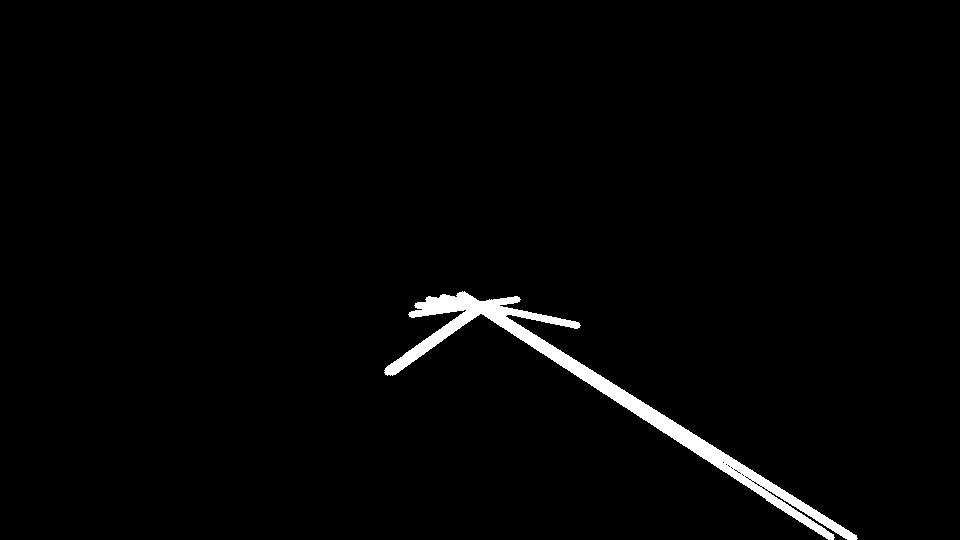

In [36]:
lines = cv.HoughLinesP(masked_edge,  rho=2, theta=np.pi/180, threshold=50, minLineLength=60, maxLineGap=25)
line_image = np.zeros_like(img)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), thickness=5)


cv2_imshow(line_image)

In [37]:
final_image = cv.addWeighted(img, 0.8, line_image, 1, 0)


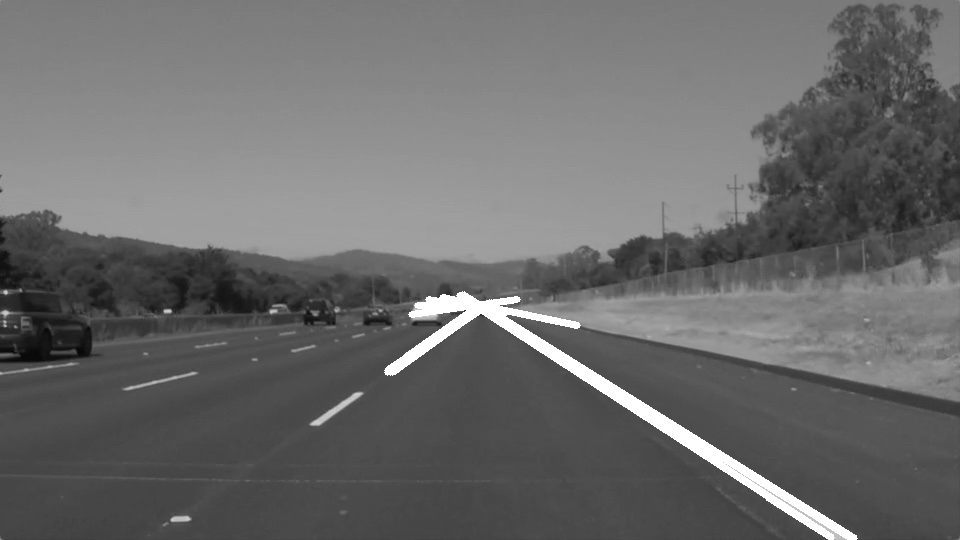

In [38]:
cv2_imshow(final_image)